In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dir = "/content/drive/MyDrive/Colab Notebooks/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

Our goal is to determine which features are the best indicators of high quality wine and generate an observation of these features affect on our red wine quality model. Our first step would be to take a look at the data in the csv file that is provided and analyze it to find best way to achieve our goal

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

We require the input features that are obtained from the physicochemical tests.

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

and our output label:
12. quality

### Data Collection

**Q3. From where do we get our data?**

We obtain our data from the UCI website. [https://archive.ics.uci.edu/ml/datasets/wine+quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

The wine was made from grapes from the nort fo Portugal. Each wine sample "was evaluated by a minimum of three sensory assessors (using blind tastes), which graded the wine in a scale that ranges from 0 (very bad) to 10 (excellent). The final sensory score is given by the median of these evaluations."

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

If we know what feature input correlates to a higher quality wine, businesses such as the producer can focus on that particular feature to create a superior product or perhaps a distributor will be able to store the wine during transport in such a way as to perserve the feature that correlates to quality.

<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [ ]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.gofplots import qqplot
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras import layers, optimizers, regularizers
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.metrics import Precision, Recall
import numpy as np

In [ ]:
df = pd.read_csv(dir + "winequality-red.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

6 different labels for quality

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Checking for nulls

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Checking for duplicates

In [ ]:
df.duplicated().sum()

240

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

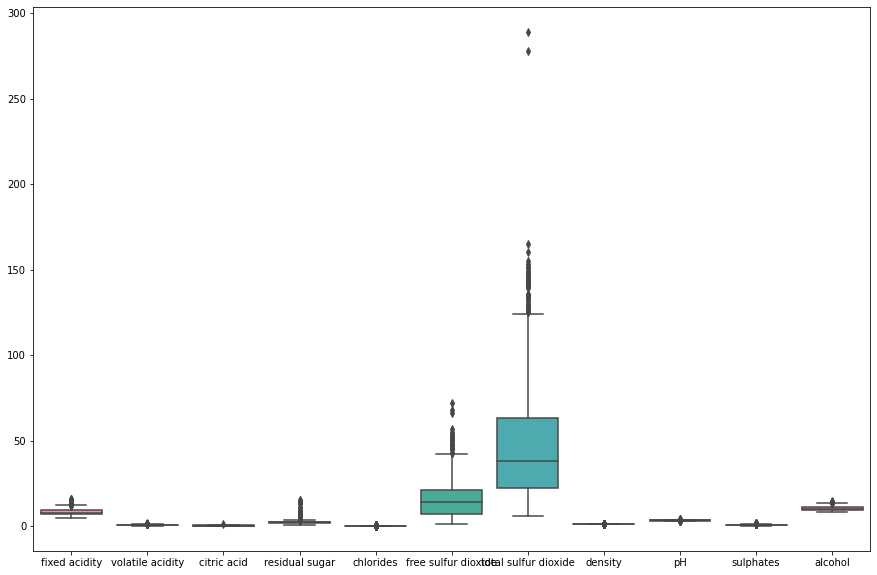

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df.iloc[:,:-1])
plt.show()

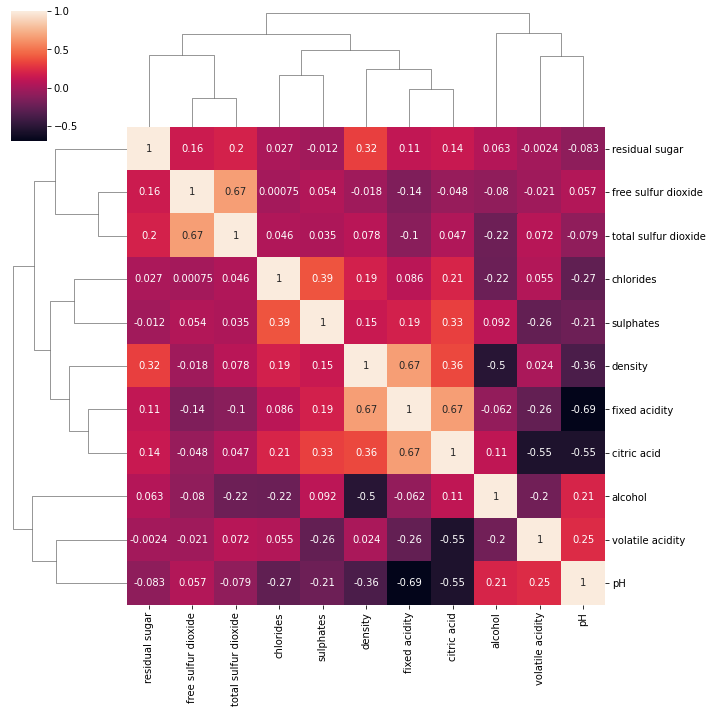

In [ ]:
sns.clustermap(df.drop(['quality'],axis=1).corr(),annot=True)
plt.grid(False)
plt.show()

## Outlier detection and removal

In [ ]:
def detect_outlier(feature, dataframe):
    outliers = []
    data = dataframe[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3: #z_score is how may std above the mean, we are checking for 3 std above the mean
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [ ]:
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for feat in feature_names:
    detect_outlier(feat,df)


Outlier caps for fixed acidity:
  --95p: 11.7 / 68 values exceed that
  --3sd: 13.5 / 9 values exceed that
  --99p: 13.2 / 14 values exceed that

Outlier caps for volatile acidity:
  --95p: 0.9 / 68 values exceed that
  --3sd: 1.1 / 9 values exceed that
  --99p: 1.0 / 14 values exceed that

Outlier caps for citric acid:
  --95p: 0.6 / 66 values exceed that
  --3sd: 0.9 / 1 values exceed that
  --99p: 0.7 / 14 values exceed that

Outlier caps for residual sugar:
  --95p: 4.8 / 67 values exceed that
  --3sd: 6.6 / 28 values exceed that
  --99p: 8.3 / 12 values exceed that

Outlier caps for chlorides:
  --95p: 0.1 / 68 values exceed that
  --3sd: 0.2 / 27 values exceed that
  --99p: 0.4 / 14 values exceed that

Outlier caps for free sulfur dioxide:
  --95p: 35.0 / 65 values exceed that
  --3sd: 47.2 / 18 values exceed that
  --99p: 50.0 / 13 values exceed that

Outlier caps for total sulfur dioxide:
  --95p: 113.0 / 67 values exceed that
  --3sd: 147.0 / 12 values exceed that
  --99p: 14

From observation, we can remove most outliers by capping at the 95th percentile.

In [ ]:
data = df.copy()

In [ ]:
# thresh = 3
# f1 = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides","free sulfur dioxide", "total sulfur dioxide", "density","pH","sulphates", "alcohol"]
# for f in f1:
#     mean = np.mean(data[f])
#     std = np.std(data[f]) 
#     for x in data[f]:
#         z = (x-mean)/std
#         if z > thresh:
#             data[f] = data[f].replace(x,mean)

In [ ]:
data['fixed acidity'].clip(upper=data['fixed acidity'].quantile(.95), inplace=True)
data['volatile acidity'].clip(upper=data['volatile acidity'].quantile(.95), inplace=True)
data['citric acid'].clip(upper=data['citric acid'].quantile(.95), inplace=True)
data['residual sugar'].clip(upper=data['residual sugar'].quantile(.95), inplace=True)
data['chlorides'].clip(upper=data['chlorides'].quantile(.95), inplace=True)
data['free sulfur dioxide'].clip(upper=data['free sulfur dioxide'].quantile(.95), inplace=True)
data['total sulfur dioxide'].clip(upper=data['total sulfur dioxide'].quantile(.95), inplace=True)
data['density'].clip(upper=data['density'].quantile(.95), inplace=True)
data['pH'].clip(upper=data['pH'].quantile(.95), inplace=True)
data['sulphates'].clip(upper=data['sulphates'].quantile(.95), inplace=True)
data['alcohol'].clip(upper=data['alcohol'].quantile(.95), inplace=True)

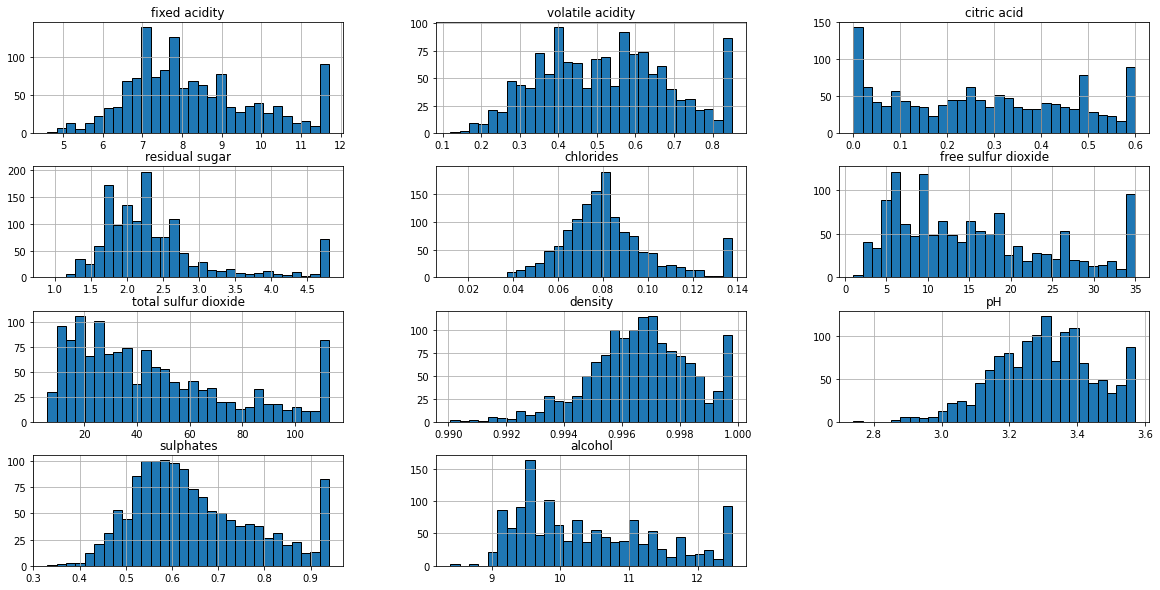

In [ ]:
data.iloc[:,:-1].hist(figsize=(20,10),bins=30, edgecolor='black')
plt.show()

In [ ]:
def generateQQ(feature): 
  for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = data[feature]**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation for {}: 1/{}".format(feature, str(i)))

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (T

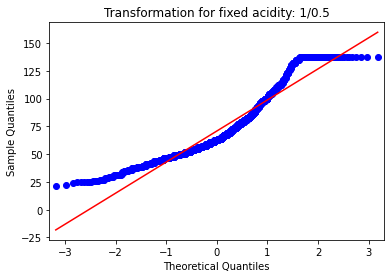

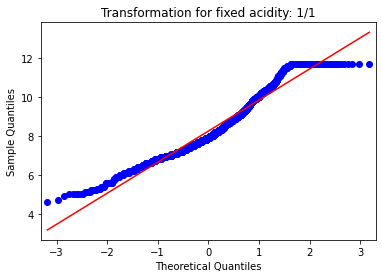

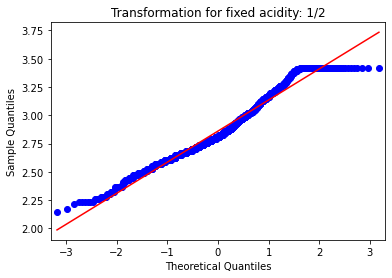

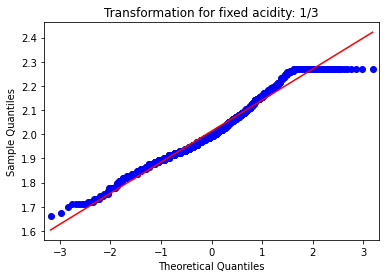

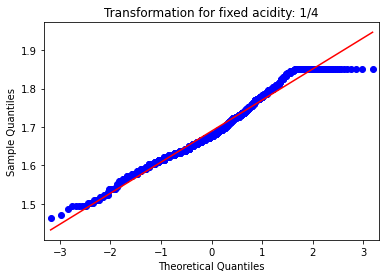

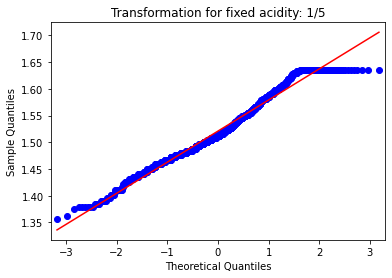

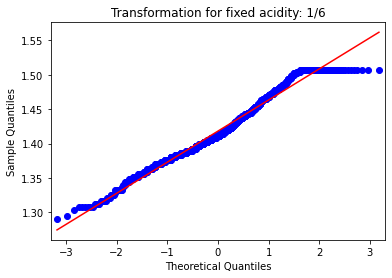

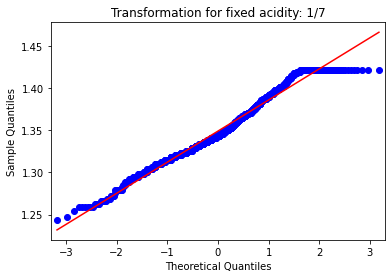

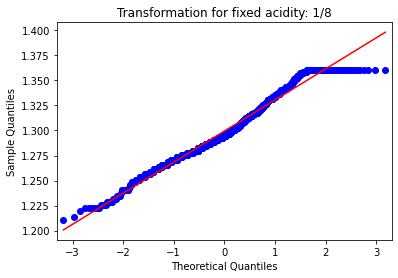

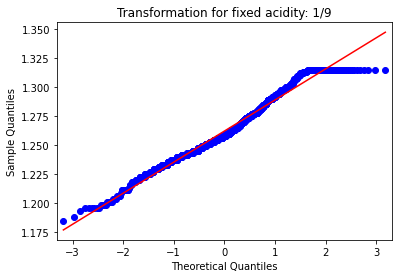

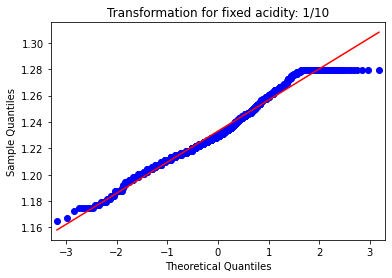

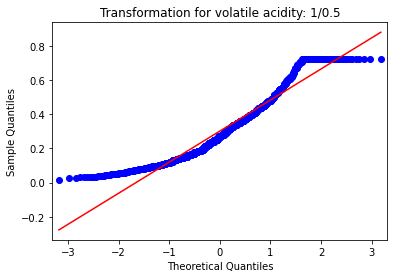

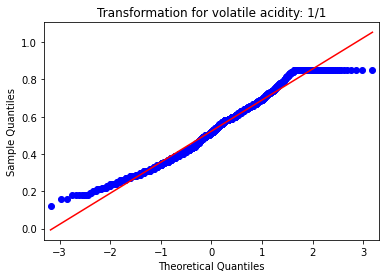

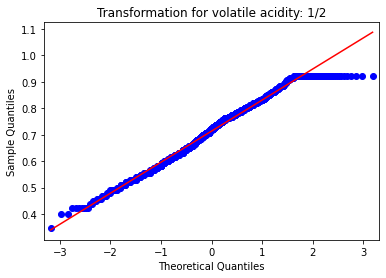

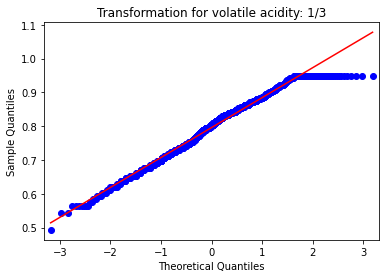

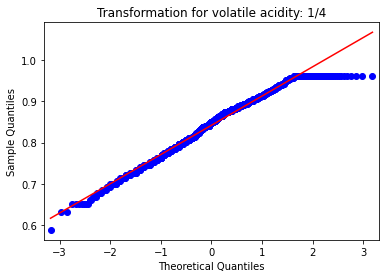

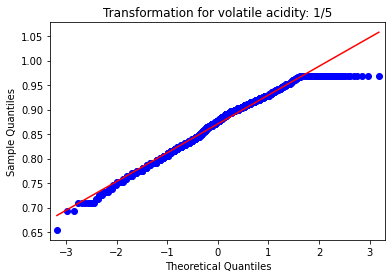

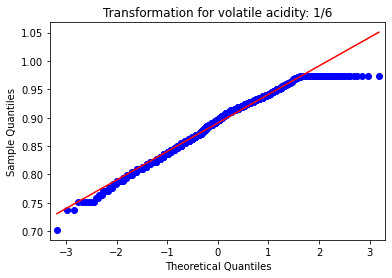

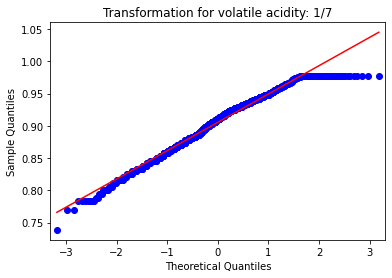

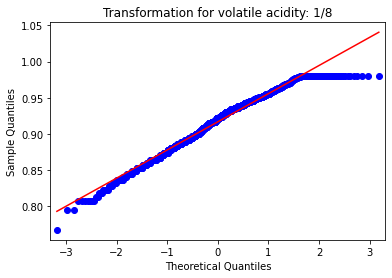

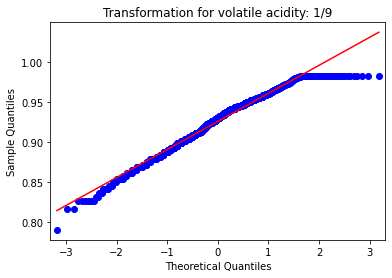

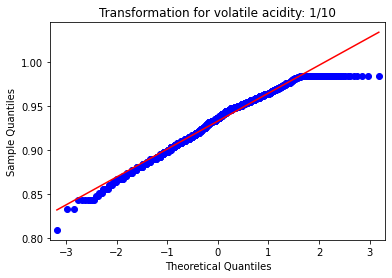

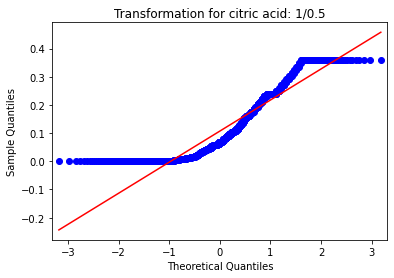

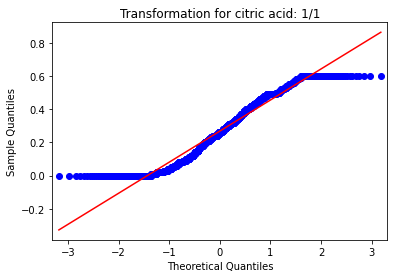

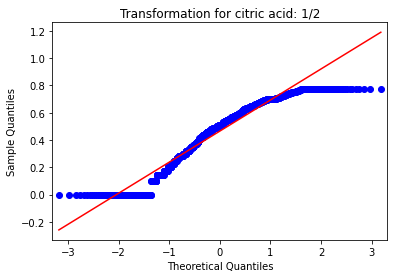

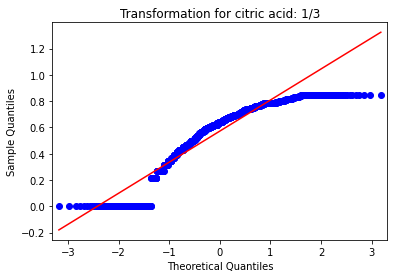

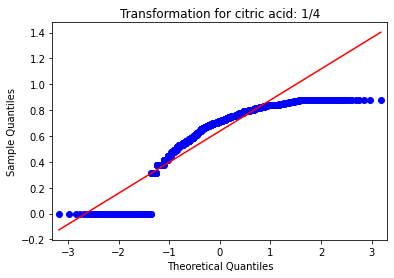

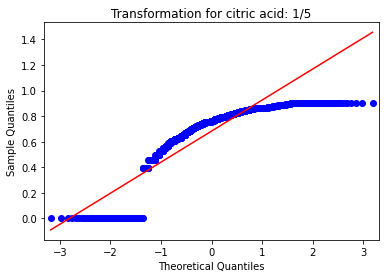

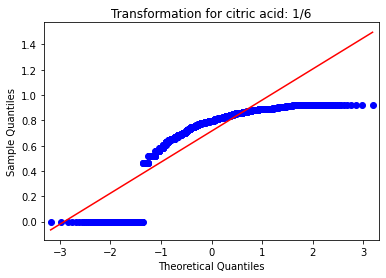

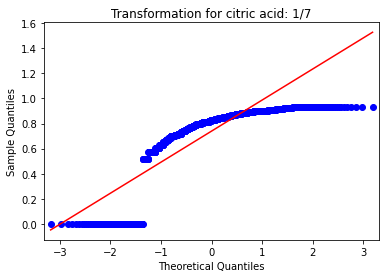

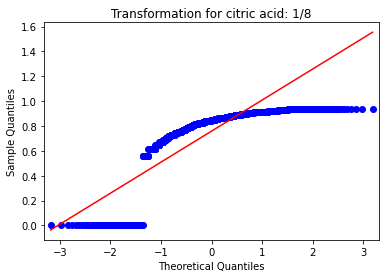

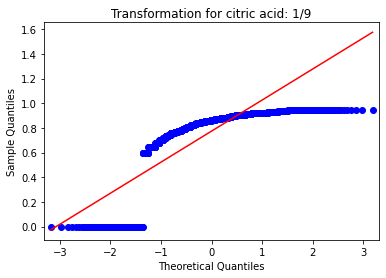

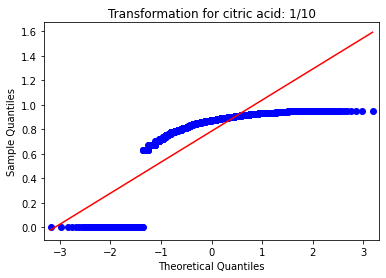

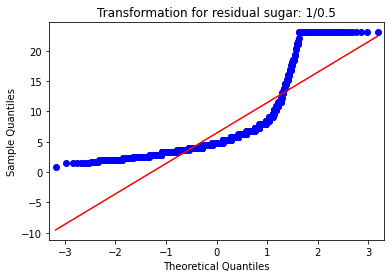

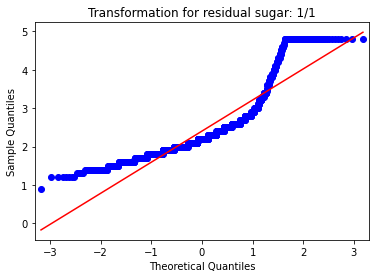

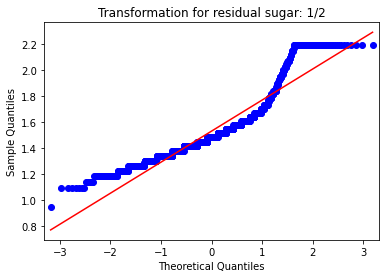

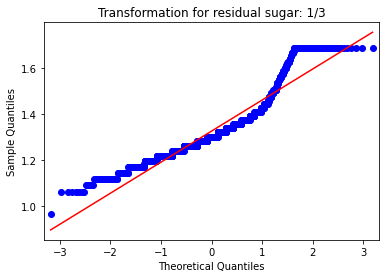

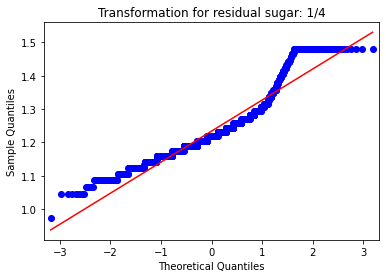

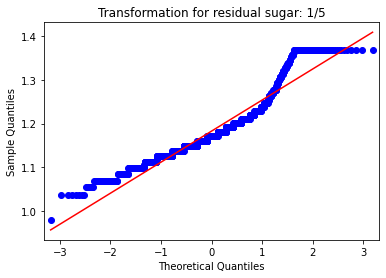

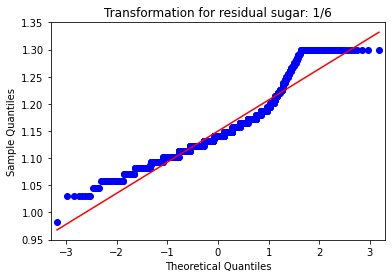

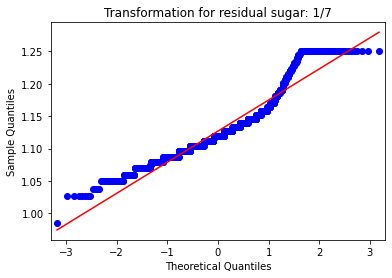

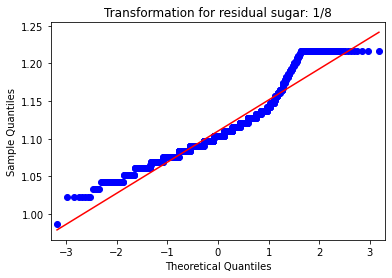

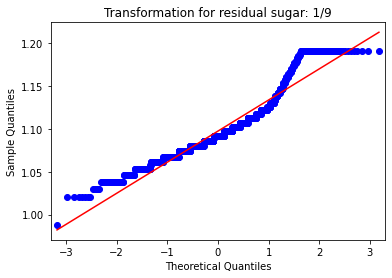

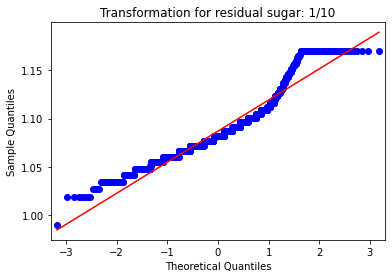

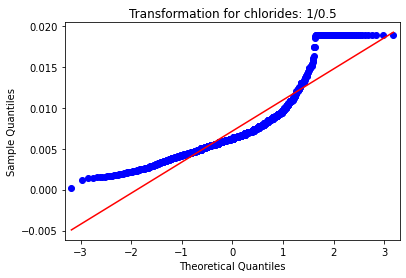

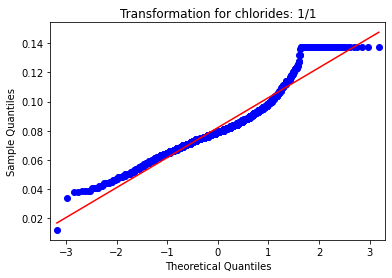

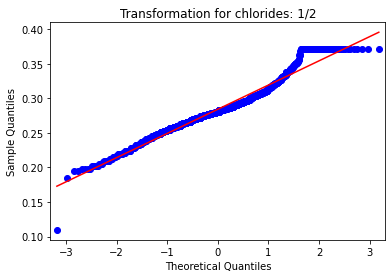

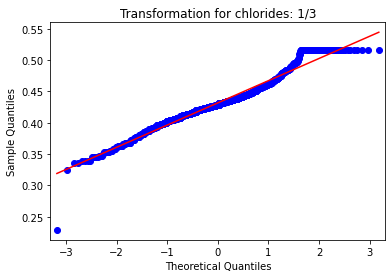

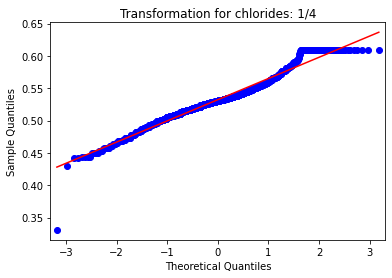

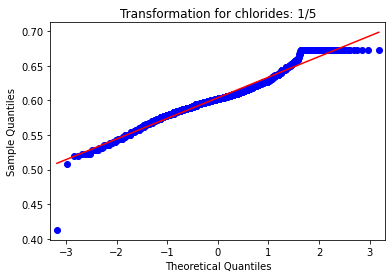

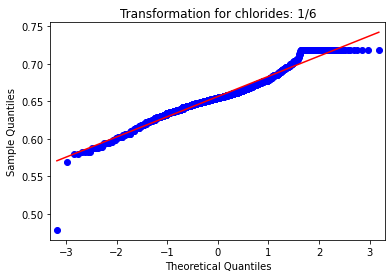

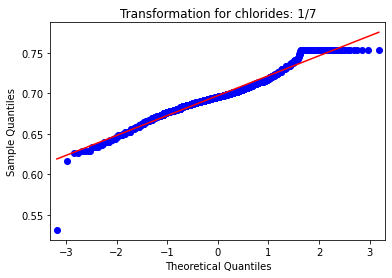

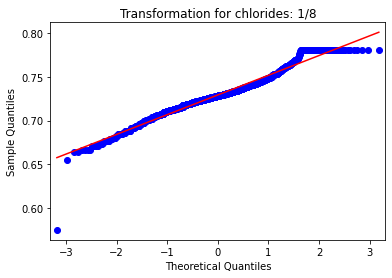

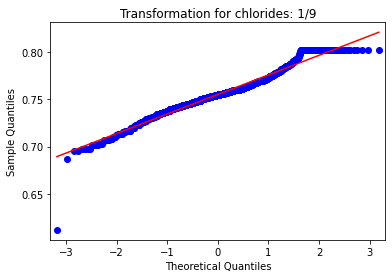

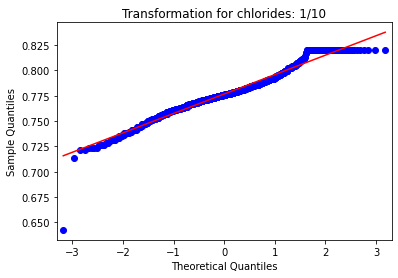

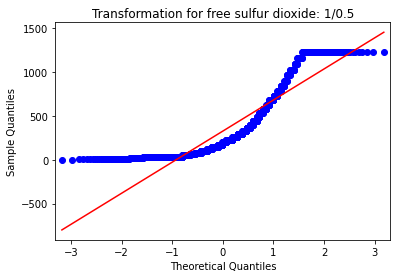

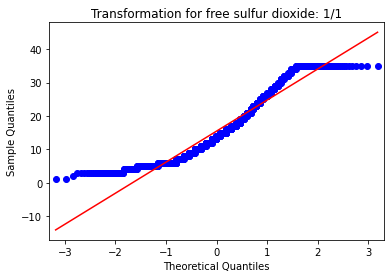

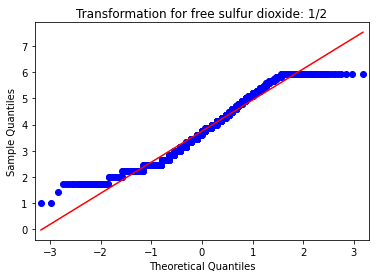

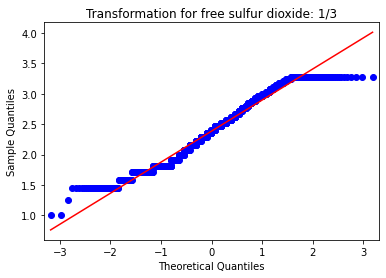

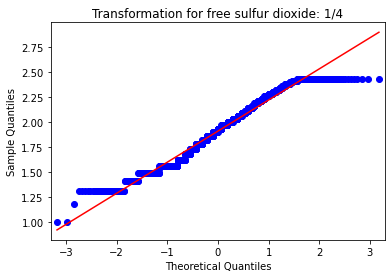

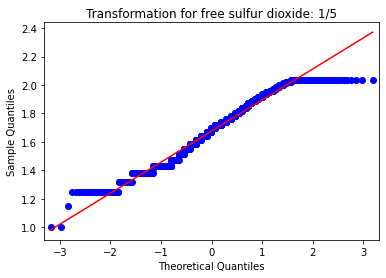

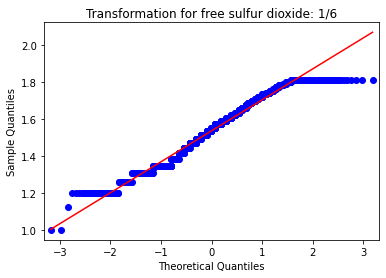

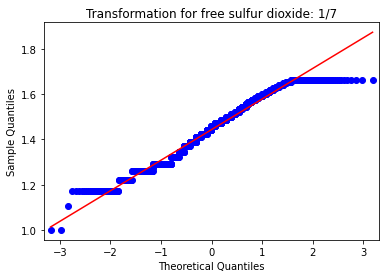

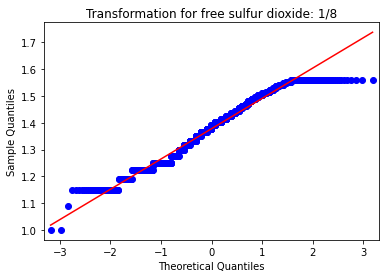

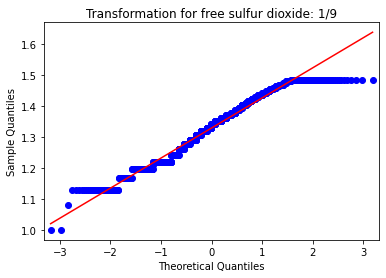

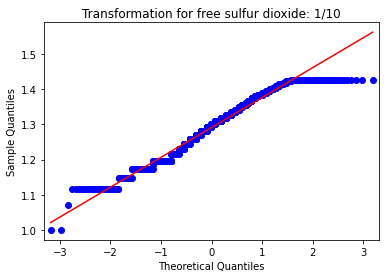

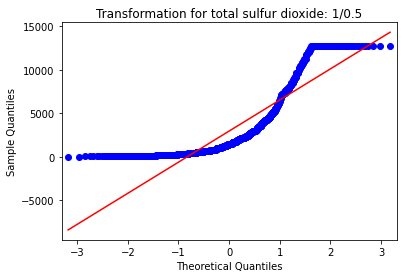

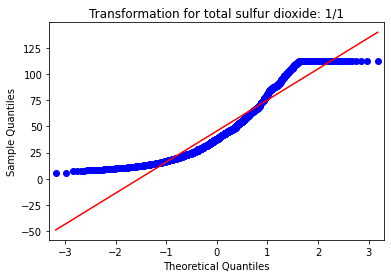

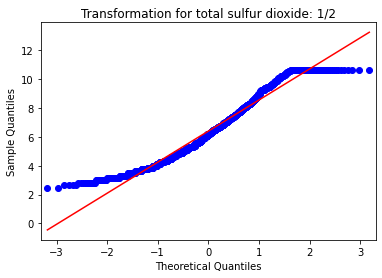

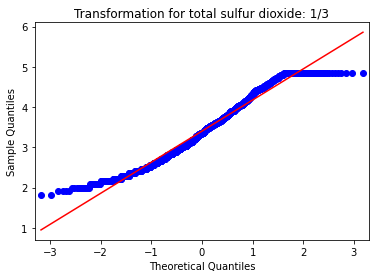

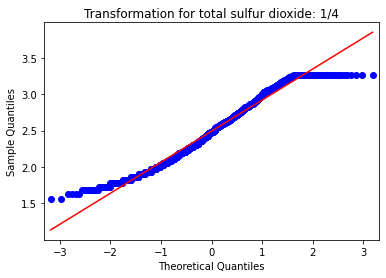

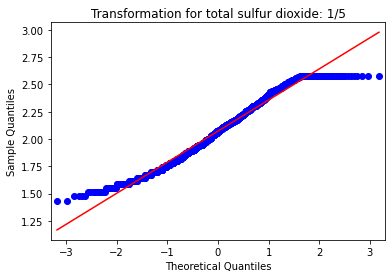

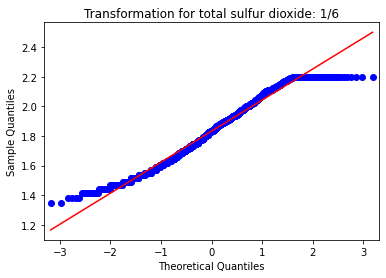

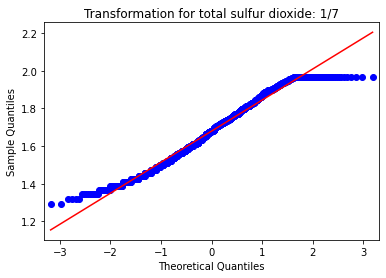

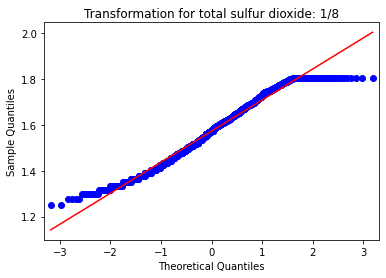

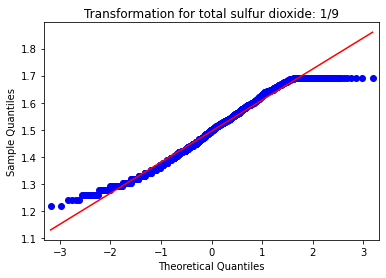

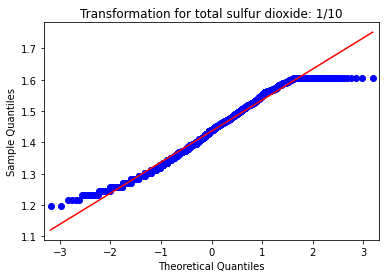

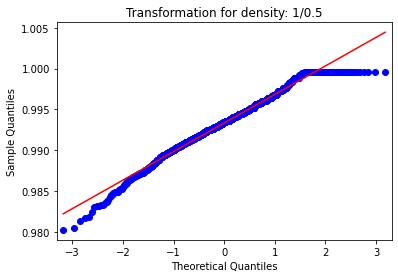

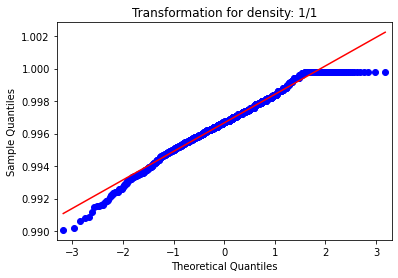

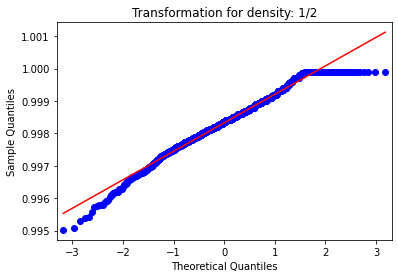

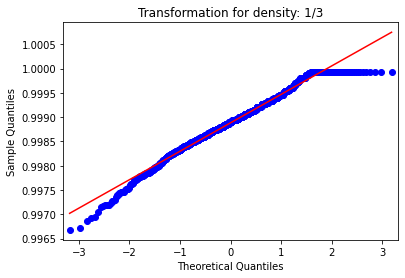

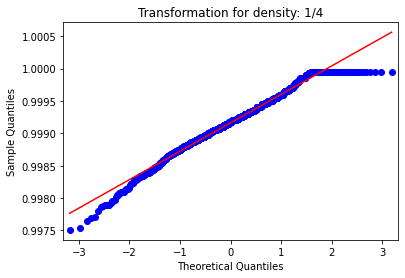

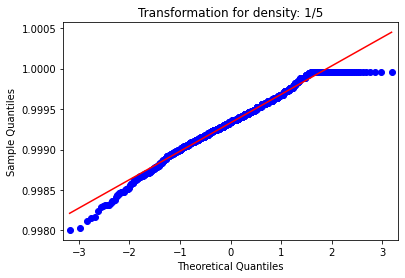

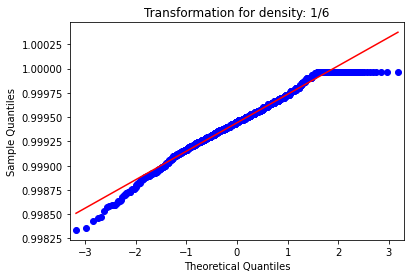

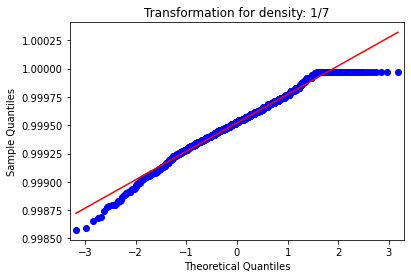

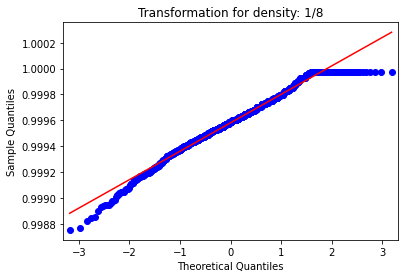

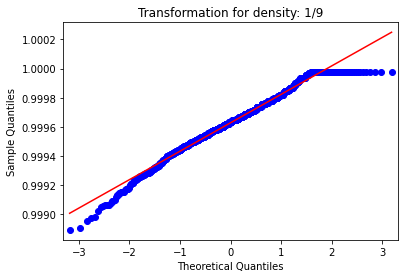

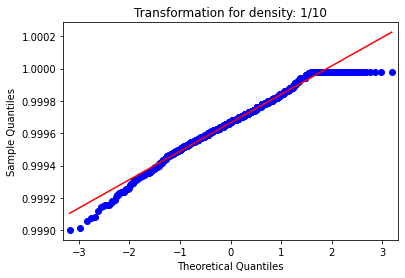

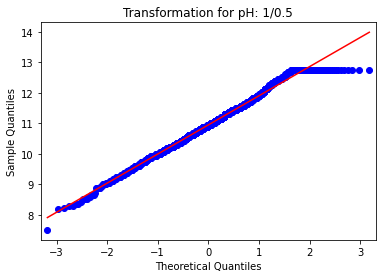

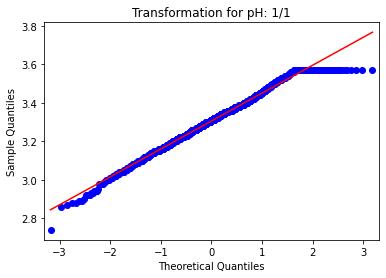

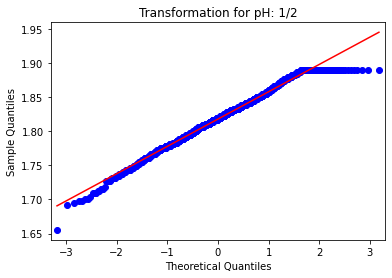

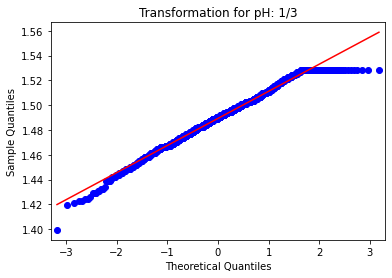

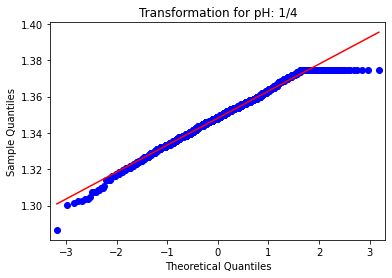

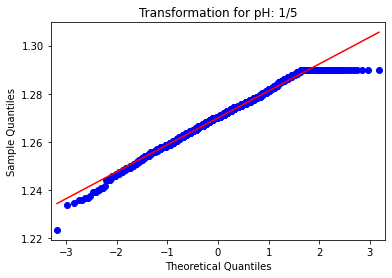

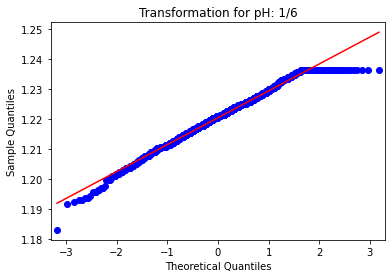

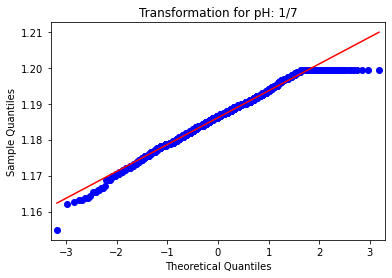

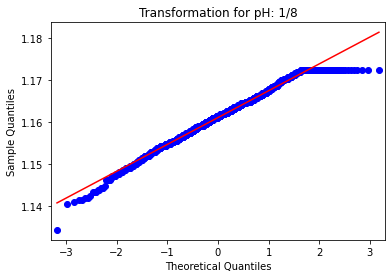

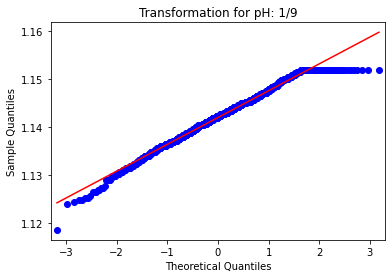

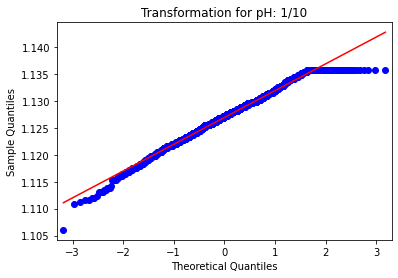

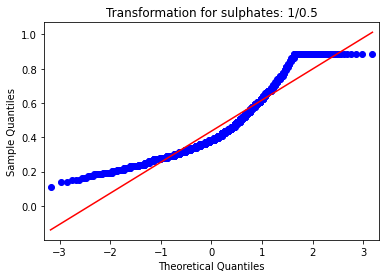

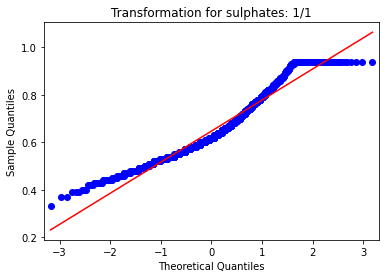

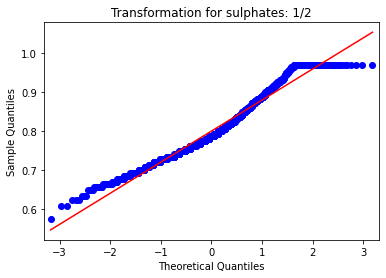

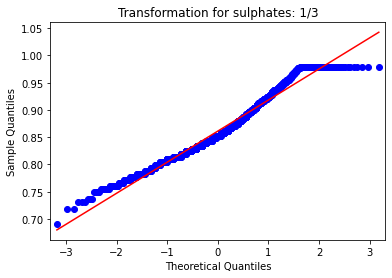

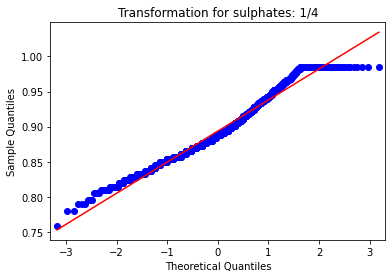

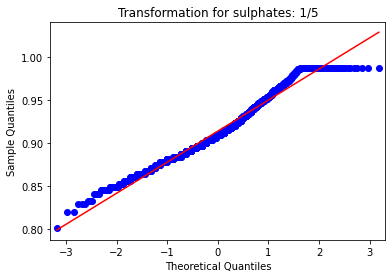

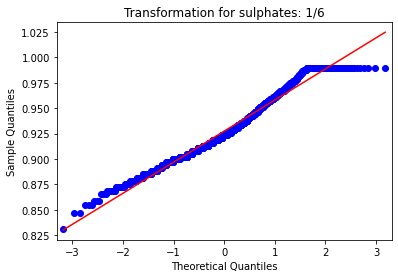

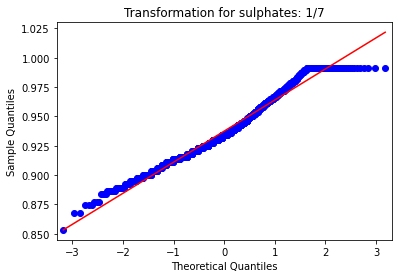

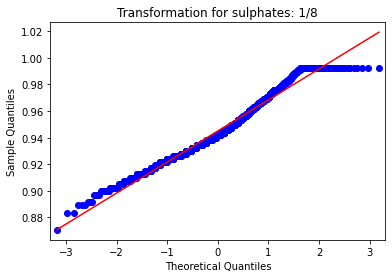

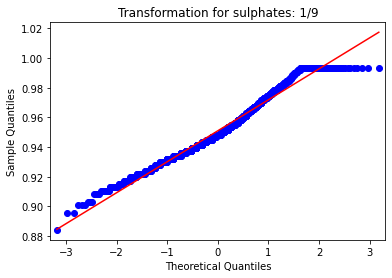

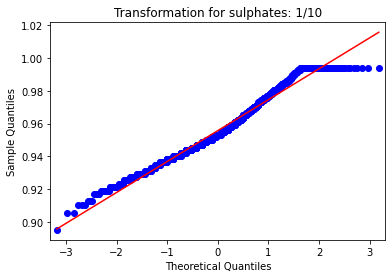

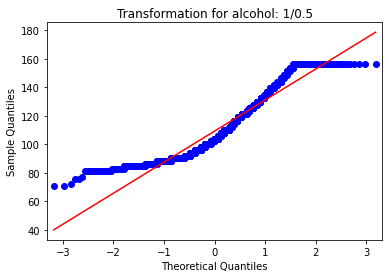

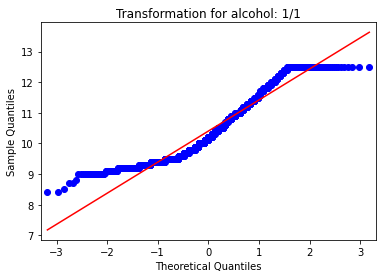

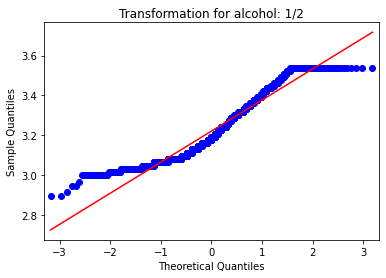

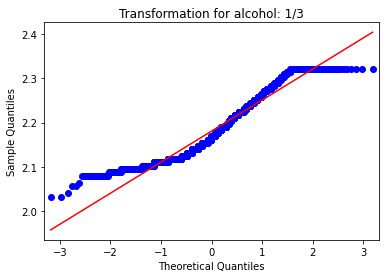

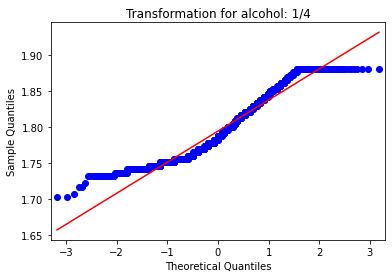

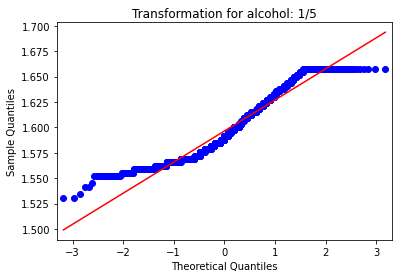

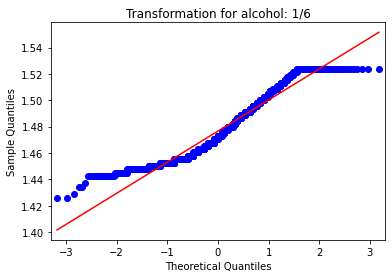

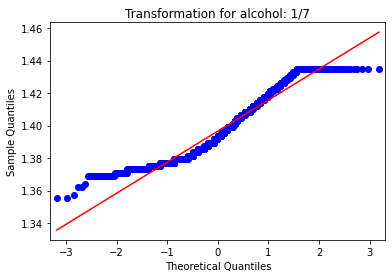

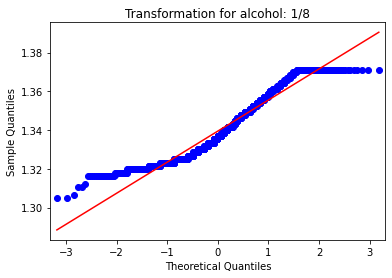

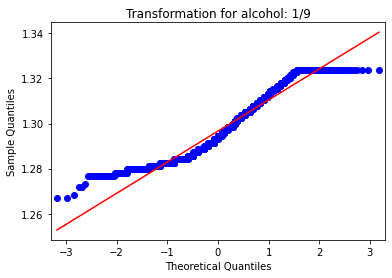

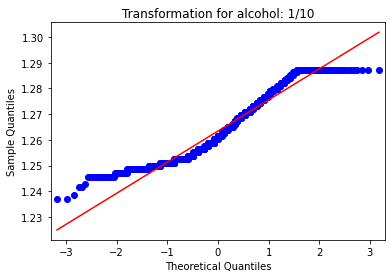

In [ ]:
for feature in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']:
  generateQQ(feature)

Observations The plot that fits the line the well for each feature is as follows:

    fixed acidity - 4 to 7
    volatile acidity - 2 to 4
    citric acid - 0.5 to 2
    residual sugar - 7 to 10
    chlorides - 4 to 7
    free sulfur dioxide - 3 to 7
    total sulfur dioxide - 4 to 8
    density - 3 to 5
    pH - 2 to 7
    sulphates - 7 to 10
    alcohol - 4 to 7



In [ ]:
observations =	{
  "fixed acidity": [4, 5, 6, 7],
  "volatile acidity": [2, 3, 4],
  "citric acid": [0.5, 1, 2],
  "residual sugar": [7, 8, 9, 10],
  "chlorides": [4, 5, 6, 7],
  "free sulfur dioxide": [3, 4, 5, 6, 7],
  "total sulfur dioxide": [4, 5, 6, 7, 8],
  "density": [3, 4, 5],
  "pH": [2, 3, 4, 5, 6, 7],
  "sulphates": [7, 8, 9, 10],
  "alcohol": [4, 5, 6, 7]
}

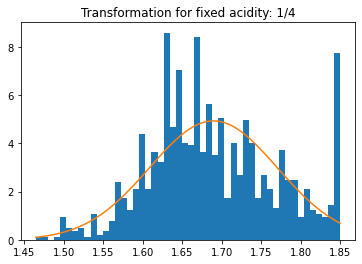

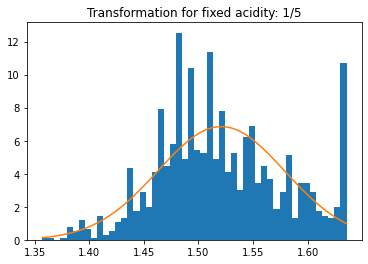

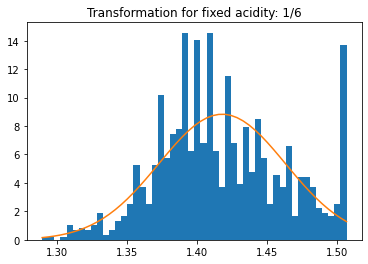

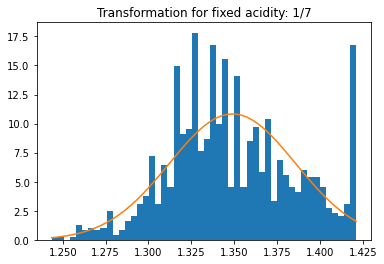

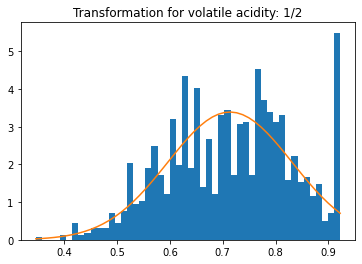

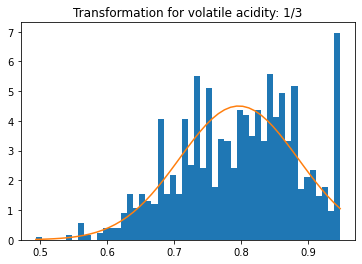

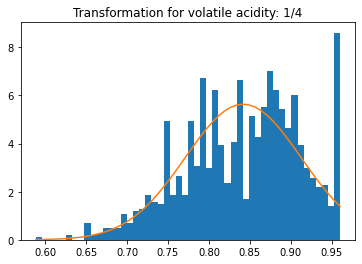

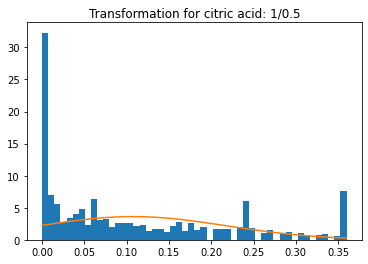

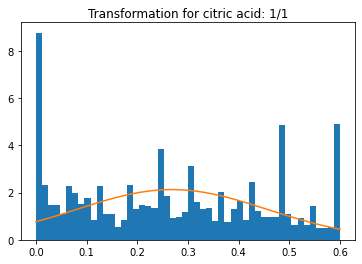

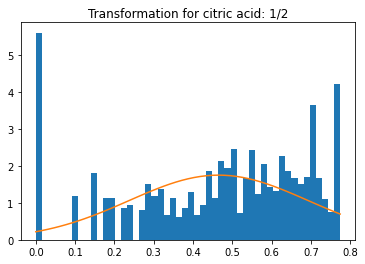

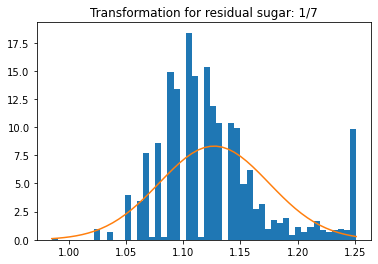

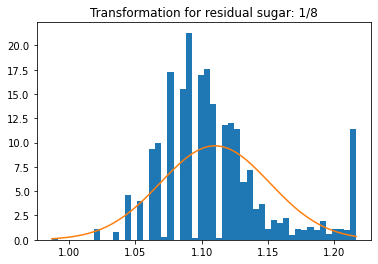

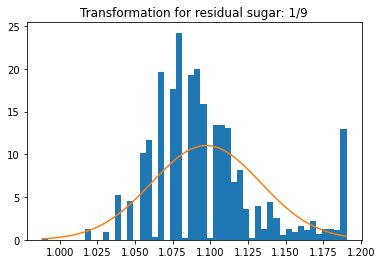

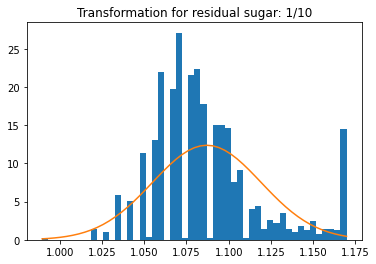

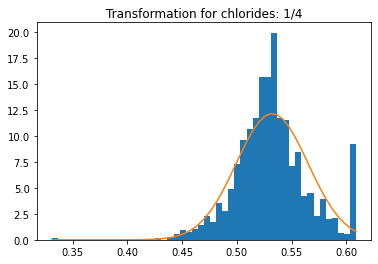

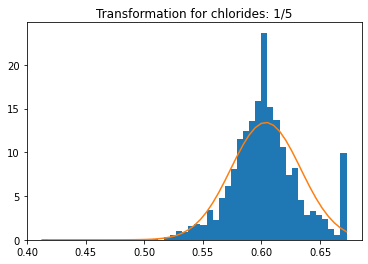

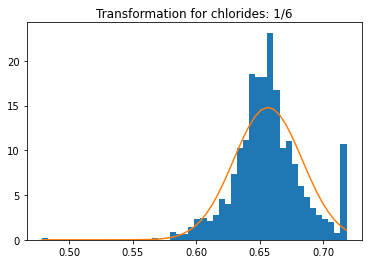

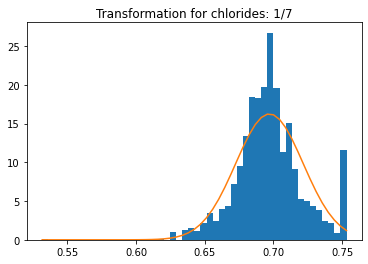

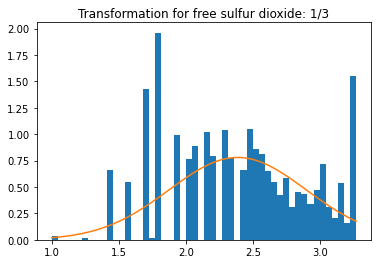

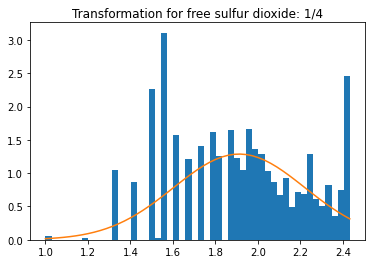

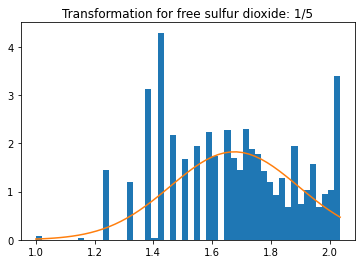

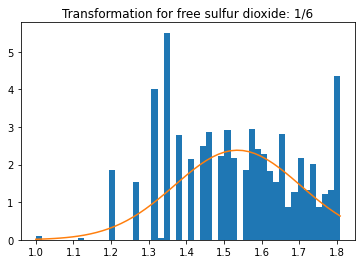

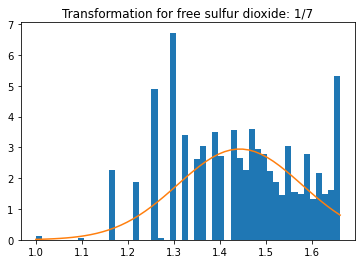

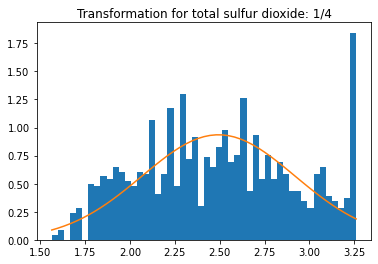

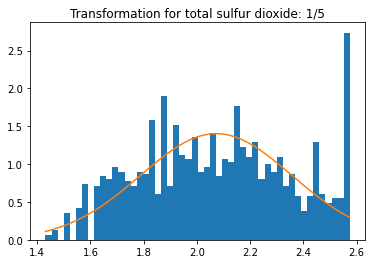

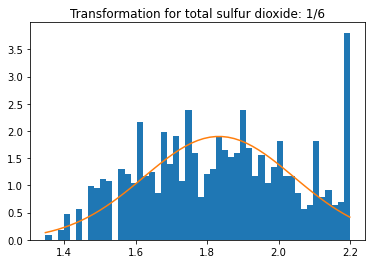

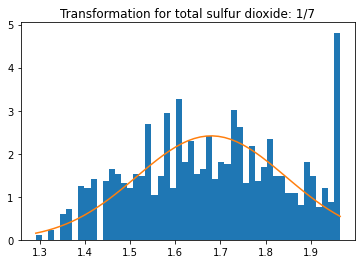

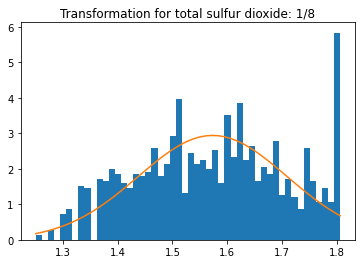

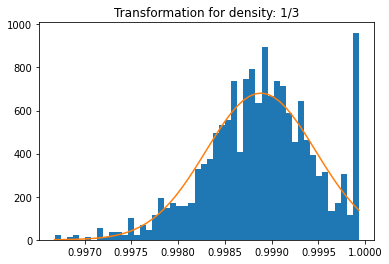

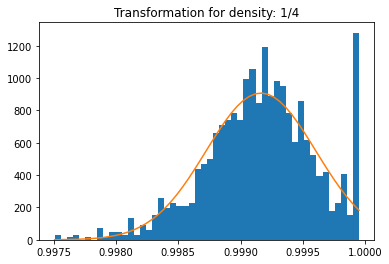

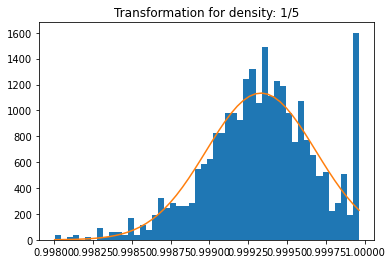

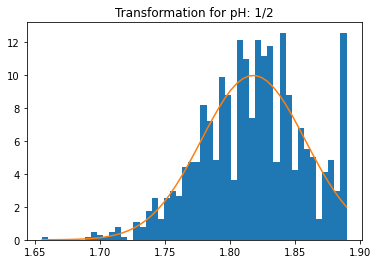

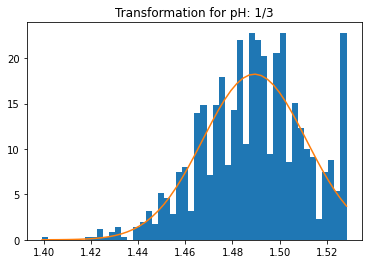

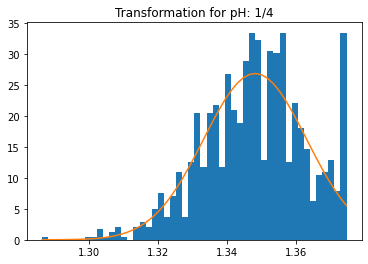

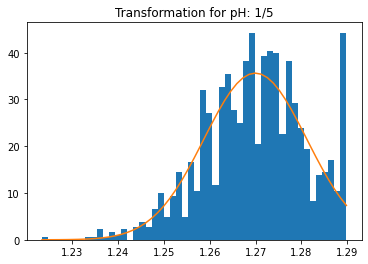

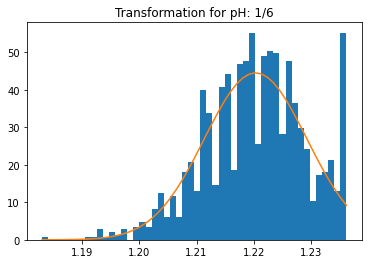

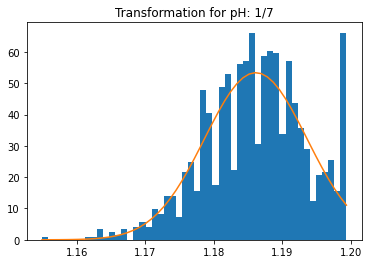

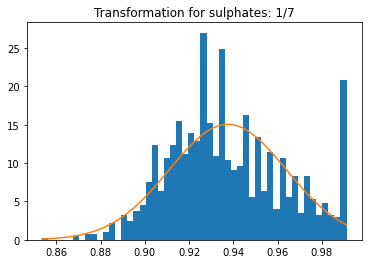

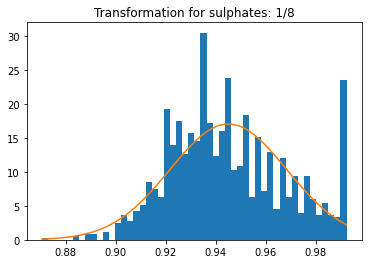

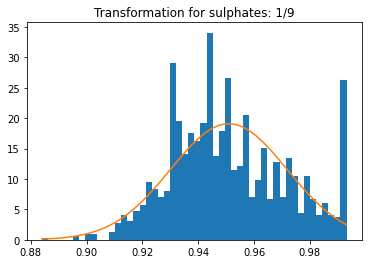

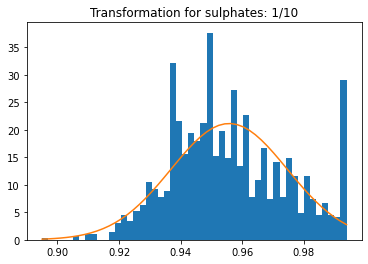

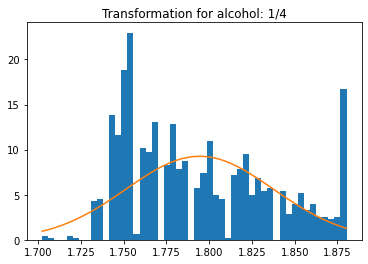

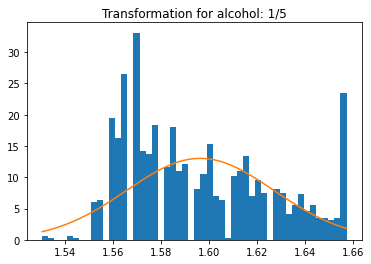

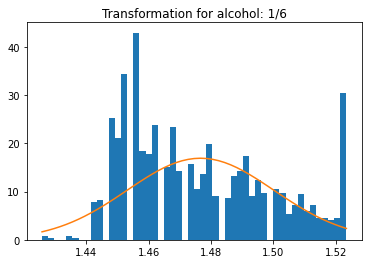

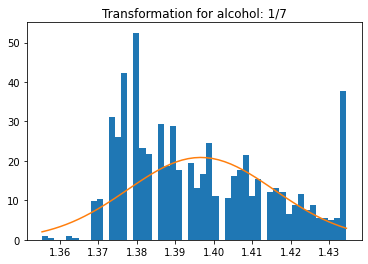

In [ ]:
for feature in observations:
  array = observations[feature]
  for i in array: # From the above QQPlot, we take the values 3 to 7 as the rest are unreasonable
    data_t = data[feature]**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation for {}: 1/{}".format(feature, str(i)))
    plt.show()

**Observation:**

The plot that fits the line the well for each feature is as follows:

    fixed acidity - 5
    volatile acidity - 2
    citric acid - 0.5
    residual sugar - 9
    chlorides - 4
    free sulfur dioxide - 4
    total sulfur dioxide - 6
    density - 3
    pH - 2
    sulphates - 8
    alcohol - 6



In [ ]:
data['fixed acidity'].clip(upper=data['fixed acidity'].apply(lambda x: x**(1/5)))
data['volatile acidity'].clip(upper=data['volatile acidity'].apply(lambda x: x**(1/2)))
data['citric acid'].clip(upper=data['citric acid'].apply(lambda x: x**(1/0.5)))
data['residual sugar'].clip(upper=data['residual sugar'].apply(lambda x: x**(1/9)))
data['chlorides'].clip(upper=data['chlorides'].apply(lambda x: x**(1/4)))
data['free sulfur dioxide'].clip(upper=data['free sulfur dioxide'].apply(lambda x: x**(1/4)))
data['total sulfur dioxide'].clip(upper=data['total sulfur dioxide'].apply(lambda x: x**(1/6)))
data['density'].clip(upper=data['density'].apply(lambda x: x**(1/3)))
data['pH'].clip(upper=data['pH'].apply(lambda x: x**(1/2)))
data['sulphates'].clip(upper=data['sulphates'].apply(lambda x: x**(1/8)))
data['alcohol'].clip(upper=data['alcohol'].apply(lambda x: x**(1/6)))

0       1.452740
1       1.462865
2       1.462865
3       1.462865
5       1.452740
          ...   
1593    1.455305
1594    1.479784
1595    1.495787
1597    1.472652
1598    1.491301
Name: alcohol, Length: 1359, dtype: float64

In [ ]:
X = data.drop(['quality'], axis=1)
y = df['quality'] # we are using channel as target variable

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_Val, y_test, y_Val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [ ]:
columns = X_train.columns

standardScaler = pd.DataFrame(x_train, columns=columns)

standardScaler.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.301429,1.944779,-1.437129,-1.286220,-0.855377,0.939110,-0.426654,-0.725588,-0.256194,-0.742073,-0.663410
1,-0.530638,-0.026520,-0.739599,0.039864,-0.226598,2.026984,0.492206,-0.795761,0.855172,-0.435268,0.430545
2,-0.914669,0.897527,-0.632287,-0.755787,1.708107,-0.257553,-0.853268,-0.725588,0.785712,0.178342,0.927797
3,-0.594643,0.835924,-1.437129,-0.490570,0.063608,-1.019065,-0.754818,0.970244,1.827618,2.249276,-0.464509
4,-0.274617,-1.258581,0.923742,0.437689,1.030960,-0.801490,-0.951717,0.397170,0.160569,1.022056,0.629446


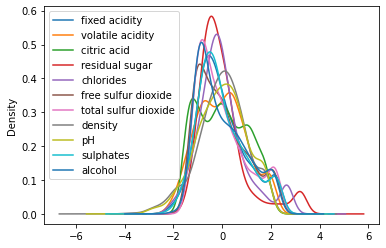

In [ ]:
pd.DataFrame(standardScaler).plot(kind='kde')

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

## Regression modelling

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_trainer = le.fit_transform(y_train)
y_tester = le.fit_transform(y_test)


In [ ]:
n_classes = 6
y_trainer = to_categorical(y_trainer, n_classes)
y_tester = to_categorical(y_tester, n_classes)

In [ ]:
y_Val = le.fit_transform(y_Val)
y_Val = to_categorical(y_Val, n_classes)

In [ ]:
# model = Sequential()
# # layer 1
# model.add(Dense(64, input_dim=11, activation='relu', name='fc0',kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
# #layer 2
# model.add(Dense(32, name='fc1',bias_initializer='zeros',activation='relu'))
# model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
# model.add(Dropout(0.5))
# #layer 3
# model.add(Dense(32, name='fc2',bias_initializer='zeros',activation='relu'))
# model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
# model.add(Dropout(0.5))
# #layer 4
# model.add(Dense(6, name='fc3',bias_initializer='zeros',activation='relu'))
# model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
# model.add(Dense(6, activation='softmax'))

# model.compile(optimizer =SGD(lr = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy", Precision(), Recall()])

##Neural Network


In [ ]:
# model = Sequential()
# model.add(Dense(256, activation='relu', input_shape=(11,)))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(6, activation='softmax'))

# model = Sequential()
# model.add(tf.keras.layers.Input(shape = 11,))
# model.add(tf.keras.layers.Dense(32,activation = 'relu'))
# model.add(tf.keras.layers.Dense(64,activation = 'relu'))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dense(128,activation = 'relu'))
# model.add(tf.keras.layers.Dense(256,activation = 'relu'))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dense(6,activation = 'softmax'))


# model = Sequential([
#     layers.Dense(32, activation='relu', input_shape=[11]),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),
#     layers.Dense(16, activation='relu'),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),
#     layers.Dense(16, activation='relu'),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),
#     layers.Dense(6, activation='softmax')
# ])

model = Sequential()
model.add(tf.keras.layers.Input(shape = 11,))
model.add(tf.keras.layers.Dense(16,activation = 'relu'))
model.add(tf.keras.layers.Dense(16,activation = 'relu'))
#model.add(tf.keras.layers.Dense(8,activation = 'relu'))
model.add(tf.keras.layers.Dense(6,activation = 'softmax'))


model.compile(optimizer =SGD(lr = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy", Precision(), Recall()])#metrics = ["accuracy", Precision(), Recall()]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#history = ann.fit(X_train, y_trainer, batch_size=32, epochs=200, verbose=1)#validation_data=(X_test, y_test)
#model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate = 0.001), metrics=['accuracy'])
history = model.fit(X_train, y_trainer, batch_size=32, epochs=300, verbose=1, validation_data=(X_Val, y_Val))
#history = ann.fit(x_train,y_trainer, batch_size=32,epochs =300, verbose =1)

Epoch 1/300
26/26 [==============================] - 1s 13ms/step - loss: 2.0544 - accuracy: 0.2454 - precision_2: 0.3984 - recall_2: 0.1202 - val_loss: 1.4995 - val_accuracy: 0.3603 - val_precision_2: 0.6607 - val_recall_2: 0.1360
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 1.5380 - accuracy: 0.4025 - precision_2: 0.6718 - recall_2: 0.1607 - val_loss: 1.3325 - val_accuracy: 0.4522 - val_precision_2: 0.6667 - val_recall_2: 0.1471
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 1.4490 - accuracy: 0.4577 - precision_2: 0.6489 - recall_2: 0.1791 - val_loss: 1.2657 - val_accuracy: 0.4743 - val_precision_2: 0.6304 - val_recall_2: 0.2132
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 1.4038 - accuracy: 0.4724 - precision_2: 0.6502 - recall_2: 0.2098 - val_loss: 1.2268 - val_accuracy: 0.5110 - val_precision_2: 0.5579 - val_recall_2: 0.1949
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 1.

In [ ]:
# z_bin = np.linspace(0.001, 0.1, 100)

# for i in z_bin:
#     print("lr = {}".format(str(i)))
#     model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate = i), metrics=['accuracy'])
#     history = model.fit(X_train, y_trainer, batch_size=64, epochs=300, verbose=0, validation_data=(X_Val, y_Val))
#     preds = model.evaluate(x = X_Val, y = y_Val)
#     print ("Loss = " + str(preds[0]))
#     print ("Test Accuracy = " + str(preds[1]))
#     print()

In [ ]:
# lr2 = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
# for x in lr2:
#   print("lr = {}".format(str(x)))
#   model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate = x), metrics=['accuracy'])
#   history = model.fit(X_train, y_trainer, batch_size=64, epochs=300, verbose=0, validation_data=(X_Val, y_Val))
#   preds = model.evaluate(x = X_Val, y = y_Val)
#   print ("Loss = " + str(preds[0]))
#   print ("Test Accuracy = " + str(preds[1]))
#   print()

## Model Evaluation

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

In [ ]:
svm = SVC(kernel='rbf', random_state = 1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [ ]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [ ]:
print('SVM:')
score = svm.score(X_test, y_test)
print("R-squared:", score) 
mse = mean_squared_error(y_test, svm_pred)
mae = mean_absolute_error(y_test, svm_pred)
print("MAE: ", mae)
print("RMSE: ", math.sqrt(mse))
svm_pred = svm.predict(X_test)

SVM:
R-squared: 0.4742647058823529
MAE:  0.6176470588235294
RMSE:  0.9155519068396106


In [ ]:
print('Random Forest:')
score = rfr.score(X_test, y_test)
print("R-squared:", score) 
mse = mean_squared_error(y_test, rfr_pred)
mae = mean_absolute_error(y_test, rfr_pred)
print("MAE: ", mae)
print("RMSE: ", math.sqrt(mse))
rfr_pred = rfr.predict(X_test)

Random Forest:
R-squared: 0.45492814738996934
MAE:  0.4991176470588235
RMSE:  0.6571747685894432


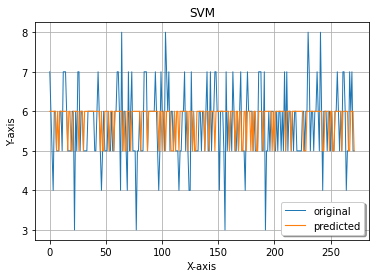

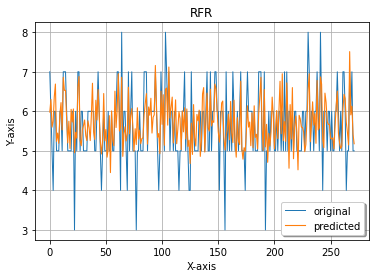

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, svm_pred, linewidth=1.1, label="predicted")
plt.title("SVM")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, rfr_pred, linewidth=1.1, label="predicted")
plt.title("RFR")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

The SVM model is superior to the RFR model in all three of the R-squared, MAE and RMSE metrics.

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [ ]:
importance = rfr.feature_importances_
for i,v in enumerate(importance):
    print('Feature:', ' ' , feature_names[i] , ',  Score:' , v)

Feature:   fixed acidity ,  Score: 0.04987354550435618
Feature:   volatile acidity ,  Score: 0.10224723899064764
Feature:   citric acid ,  Score: 0.0427569608804911
Feature:   residual sugar ,  Score: 0.054998732808675295
Feature:   chlorides ,  Score: 0.06579271590839071
Feature:   free sulfur dioxide ,  Score: 0.04793747618899569
Feature:   total sulfur dioxide ,  Score: 0.08718093771211871
Feature:   density ,  Score: 0.05471949258431638
Feature:   pH ,  Score: 0.07255477752675117
Feature:   sulphates ,  Score: 0.14190088763913614
Feature:   alcohol ,  Score: 0.28003723425612104


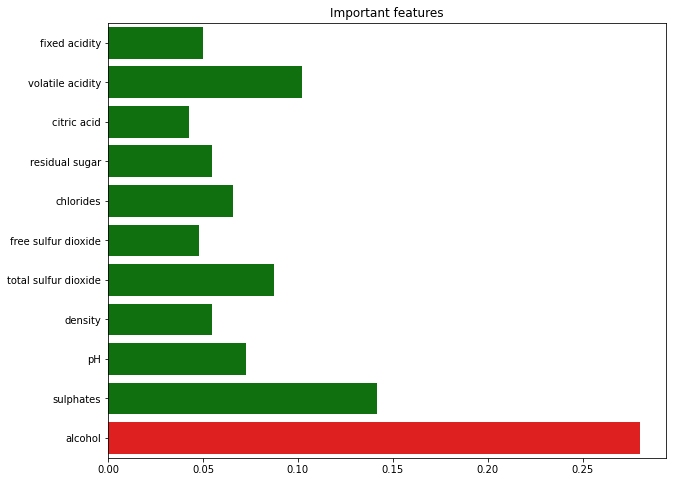

In [ ]:
values = importance
idx = feature_names
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features')
plt.show()

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

In [ ]:
predictions = model.evaluate(x = X_train, y = y_trainer)
print()
print ("Training Loss = " + str(predictions[0]))
print ("Test Accuracy = " + str(predictions[1]))

26/26 [==============================] - 0s 1ms/step - loss: 1.1019 - accuracy: 0.5387 - precision_2: 0.6686 - recall_2: 0.2798

Training Loss = 1.101865530014038
Test Accuracy = 0.5386503338813782


In [ ]:
loss, accuracy, precision, recall = model.evaluate(x = X_Val, y = y_Val)
print()
print ("Validation Loss = " + str(predictions[0]))
print ("Validation Accuracy = " + str(predictions[1]))

9/9 [==============================] - 0s 2ms/step - loss: 1.0512 - accuracy: 0.4779 - precision_2: 0.6316 - recall_2: 0.2647

Validation Loss = 1.101865530014038
Validation Accuracy = 0.5386503338813782


In [ ]:
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score {}'.format(2 * (precision * recall) / (precision + recall)))

Precision: 0.6315789222717285
Recall: 0.2647058963775635
F1 Score 0.37305700436845274


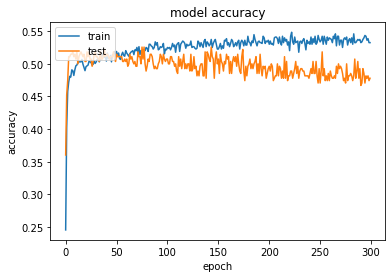

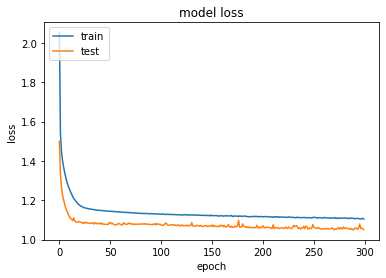

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Conclusion

In conclusion, we have determined that a high quality wine highly correlates with the higher alcohol, sulphates, volatile acidity and total sulfur dioxide levels. Experts tend to identify wines with lower levels of citric acid, and higher amounts of alcohol and sulphates as higher-quality wines.

In [ ]:
X_Val.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
995,7.7,0.6,0.06,2.0,0.079,19.0,41.0,0.99697,3.39,0.62,10.1


In [ ]:
X_Val.iloc[0].shape

(11,)

In [ ]:
test = tf.reshape(X_Val.iloc[0], [1, 11])

In [ ]:
test.shape

TensorShape([1, 11])

In [ ]:
tf.test

<tf.Tensor: shape=(1, 11), dtype=float64, numpy=
array([[ 7.7    ,  0.6    ,  0.06   ,  2.     ,  0.079  , 19.     ,
        41.     ,  0.99697,  3.39   ,  0.62   , 10.1    ]])>

In [ ]:
model.predict(test)

array([[0.00355121, 0.04910957, 0.33519584, 0.46938786, 0.12865055,
        0.01410503]], dtype=float32)

In [ ]:
  df.quality.unique()

array([5, 6, 7, 4, 8, 3])